Part - A
1.

for Q = 2
Confusion Matrix ->
 [[676  49]
 [ 44   7]]
Accuracy = 0.8801546391752577

for Q = 4
Confusion Matrix ->
 [[712  13]
 [ 50   1]]
Accuracy = 0.9188144329896907

for Q = 8
Confusion Matrix ->
 [[661  64]
 [ 34  17]]
Accuracy = 0.8737113402061856

for Q = 16
Confusion Matrix ->
 [[719   6]
 [ 50   1]]
Accuracy = 0.9278350515463918

Part - B

1(a).


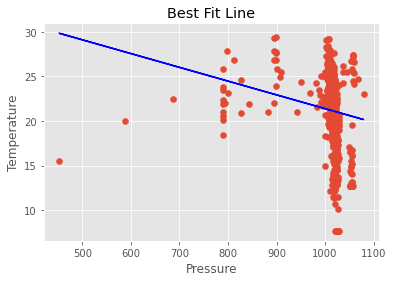


1(b).
Prediction Accuracy on training dataset = 4.2797904336825985

1(c).
Prediction Accuracy on testing dataset = 4.286985483129511

1(d).


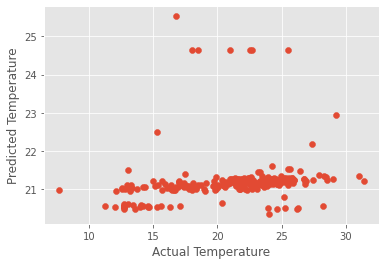


2(a).
Prediction Accuracy on train dataset for p = 2 is  4.077343977332171
Prediction Accuracy on train dataset for p = 3 is  3.933192557101051
Prediction Accuracy on train dataset for p = 4 is  3.926236013586988
Prediction Accuracy on train dataset for p = 5 is  3.927677426942784

Plot of Prediction Accuracy on train dataset for different p values 


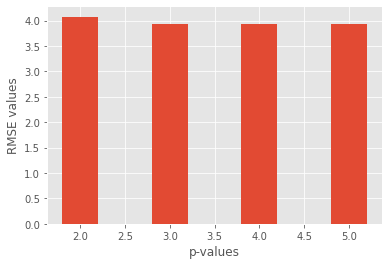


2(b).
Prediction Accuracy on test dataset for p = 2 is  4.035903589299525
Prediction Accuracy on test dataset for p = 3 is  3.750152840628961
Prediction Accuracy on test dataset for p = 4 is  3.749040418297262
Prediction Accuracy on test dataset for p = 5 is  3.7480025803828294

Plot of Prediction Accuracy on train dataset for different p values 


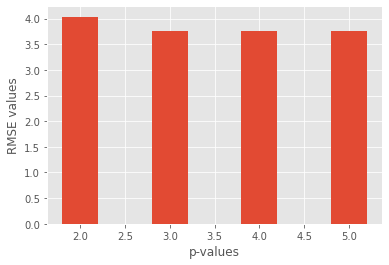


2(c).
Polynomial curve fitting having minimum RMSE error is for p=5


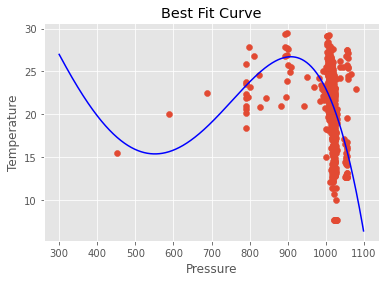


2(d).
plot of Predicted Temperature v/s Actual on the test data for p=5


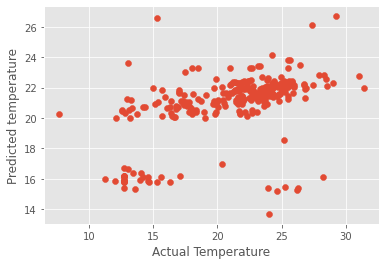

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import mixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import PolynomialFeatures
import math

# Part - A
# Q1. 
print('Part - A\n1.')
X_train = pd.read_csv('seismic-bumps-train.csv')
X_test = pd.read_csv('seismic-bumps-test.csv')

attr = list(X_train)[1:]
X_train_0 = X_train[X_train['class']==0].loc[:,attr[:-1]]
X_train_1 = X_train[X_train['class']==1].loc[:,attr[:-1]]

prior_0 = len(X_train_0)/len(X_train)
prior_1 = len(X_train_1)/len(X_train)

for i in [2,4,8,16]:
    GMM = mixture.GaussianMixture(n_components=i,covariance_type='full',random_state=42)
    
    GMM_0 = GMM.fit(X_train_0)
    log_0 = GMM_0.score_samples(X_test.loc[:,attr[:-1]])
    p0 = np.exp(log_0)*prior_0
    
    GMM_1 = GMM.fit(X_train_1)
    log_1 = GMM_1.score_samples(X_test.loc[:,attr[:-1]])
    p1 = np.exp(log_1)*prior_1
    
    GMM_pred =[]
    for j in range(len(X_test)):
        if p0[j] > p1[j]:
            GMM_pred.append(0)
        else:
            GMM_pred.append(1)
    
    print("\nfor Q =",i)
    print('Confusion Matrix ->\n',confusion_matrix(X_test['class'],GMM_pred))
    print('Accuracy =',accuracy_score(X_test['class'],GMM_pred))
    
    
# Part - B
# Q1(a)_______________________ 

print("\nPart - B\n\n1(a).")
data = pd.read_csv("atmosphere_data.csv")
x = data['pressure']
y = data['temperature']
X_train , X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=42, shuffle=True)
x = np.array(X_train)
y = np.array(Y_train)
x = x.reshape(-1,1)
y = y.reshape(-1,1)

reg = LinearRegression().fit(x, y) # regressor
y_pred_train = reg.predict(x)

plt.plot(x,y_pred_train,color='b')
plt.scatter(x,y)   # scatter plot
plt.title("Best Fit Line")
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

# Q1(b)__________________________

def PredAccuracy(Y_pred,Y): # it gives prediction accuracy
    number = Y.shape[0]
    ans = 0
    for i in range(number):
        ans += (Y[i]-Y_pred[i])**2
    ans/=number
    ans = math.sqrt(ans)
    return ans

acc = PredAccuracy(y_pred_train,y)
print('\n1(b).\nPrediction Accuracy on training dataset =',acc)

# Q1(c)__________________________
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1,1)
y_pred_test = reg.predict(X_test)

acc = PredAccuracy(y_pred_test,Y_test)
print('\n1(c).\nPrediction Accuracy on testing dataset =',acc)

# Q1(d)___________________________
print('\n1(d).')
plt.scatter(Y_test,y_pred_test)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.show()

# Q2(a)____________________________________________
p = [2,3,4,5]  # p-values
X1 = []
Y1 = []

print('\n2(a).')
for i in p:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,y)
    
    y_train_pred = lin_reg.predict(X_poly)
    
    acc = PredAccuracy(y_train_pred,np.array(Y_train))  # Prediction Accuracy on train dataset
    print("Prediction Accuracy on train dataset for p =",i,"is ",acc)
    X1.append(i)
    Y1.append(acc)
    
print("\nPlot of Prediction Accuracy on train dataset for different p values ")    
plt.bar(X1,Y1,width=0.4)
plt.ylabel("RMSE values")
plt.xlabel("p-values")
plt.show()

# Q2(b)________________________________________
print('\n2(b).')
Y2 = []
for i in p:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(x)
    X_poly1 = poly_reg.fit_transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,y)
    
    y_test_pred = lin_reg.predict(X_poly1)
    ans = PredAccuracy(y_test_pred,np.array(Y_test)) # Prediction Accuracy on test dataset 
    print("Prediction Accuracy on test dataset for p =",i,"is ",ans)
    Y2.append(ans)
    
print("\nPlot of Prediction Accuracy on train dataset for different p values ")    
plt.bar(X1,Y2,width=0.4)  # bar graph
plt.ylabel("RMSE values")
plt.xlabel("p-values")
plt.show()

# Q2(c)______________________________________

print('\n2(c).')
print("Polynomial curve fitting having minimum RMSE error is for p=5")
X = np.asarray(X_train)
Y  = y_train_pred
Y = Y.T
Y = Y[0].tolist()

x1 = np.polyfit(X,Y,5)
poly = np.poly1d(x1)

X = [x for x in range(300,1100)]
Y = [poly(x) for x in X]

plt.plot(X,Y,color = "b")
plt.scatter(X_train, Y_train)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.title("Best Fit Curve")
plt.show()

# Q2(d)______________________________________

print('\n2(d).')
print("plot of Predicted Temperature v/s Actual on the test data for p=5")
plt.scatter(Y_test,y_test_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted temperature")
plt.show()   